# 2.5 関数の最適化

## 2.5.2 多変数関数の勾配法

In [ ]:
using PyPlot
using ForwardDiff

In [2]:
# ２次関数を定義
x_opt = [0.50, 0.25]
f₂(x) = -sqrt(0.05 + (x[1] - x_opt[1])^2) - (x[2] - x_opt[2])^2

f₂ (generic function with 1 method)

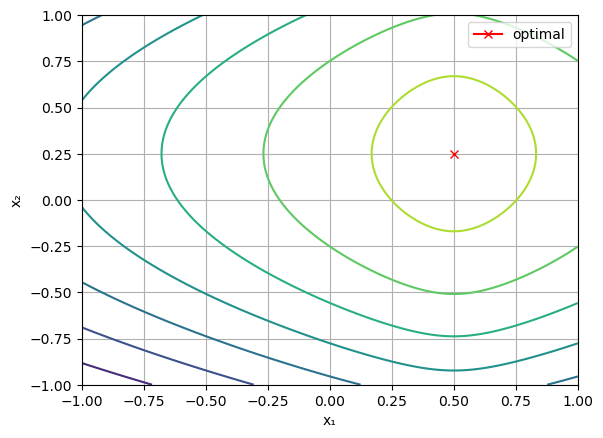

PyObject <matplotlib.legend.Legend object at 0x14a40aac0>

In [5]:
# 関数を等高線図として可視化
L = 100
xs₁ = range(-1, 1, length=L)
xs₂ = range(-1, 1, length=L)
fig, ax = subplots()
ax.contour(xs₁, xs₂, [f₂([x₁, x₂]) for x₁ in xs₁, x₂ in xs₂]')
ax.plot(x_opt[1], x_opt[2], color="r", marker="x", label="optimal")
ax.set_xlabel("x₁"), ax.set_ylabel("x₂")
ax.grid()
ax.legend()

In [12]:
# 多変数解析のための勾配法
function gradient_method(f, x_init, η, maxiter)
    # 最適化過程のパラメータを格納する配列
    x_seq = Array{typeof(x_init[1]), 2}(undef, length(x_init), maxiter)
    
    # 勾配
    ∇f(x) = ForwardDiff.gradient(f, x)
    
    # 初期値
    x_seq[:, 1] = x_init
    
    # メインの最適化ループ
    for i in 2:maxiter
        x_seq[:, i] = x_seq[:, i-1] + η*∇f(x_seq[:, i-1])
    end
    
    x_seq
end

gradient_method (generic function with 1 method)

In [13]:
# パラメータの設定
x_init = [-0.75, -0.75]
maxiter = 20
η = 0.1

# 最適化の実行
x_seq = gradient_method(f₂, x_init, η, maxiter)
f_seq = [f₂(x_seq[:,i]) for i in 1:maxiter]

20-element Vector{Float64}:
 -2.2698425099200294
 -1.8130713587869223
 -1.4864674129221398
 -1.2435333058718216
 -1.0546304357566991
 -0.9009647514196972
 -0.7707699828580662
 -0.6569195690940037
 -0.5554903555124693
 -0.46498971917861137
 -0.3860446444970153
 -0.3212180328272999
 -0.27400717006417613
 -0.2457105046976077
 -0.23231600743801767
 -0.22703677774417294
 -0.22508176283129977
 -0.22432371767829845
 -0.2239955619536749
 -0.2238341324318122

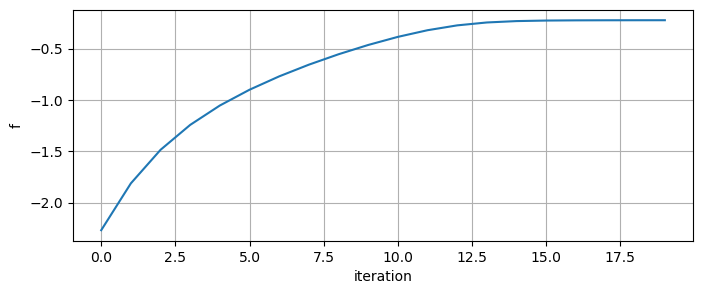

In [14]:
# 目的関数の値をステップごとにプロット
fig, ax = subplots(figsize=(8,3))
ax.plot(f_seq)
ax.set_xlabel("iteration"), ax.set_ylabel("f")
ax.grid()

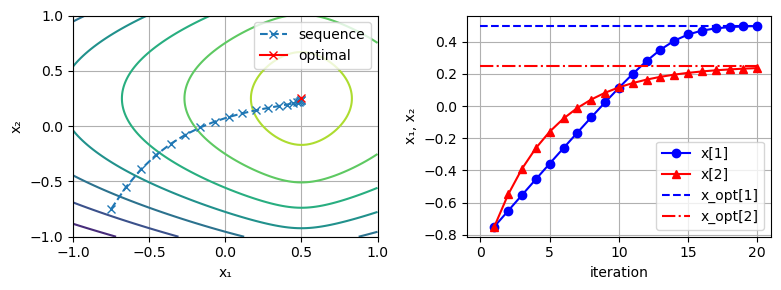

In [15]:
fig, axes = subplots(1,2,figsize=(8,3))

# 等高線図で関数を可視化
axes[1].contour(xs₁, xs₂, [f₂([x₁, x₂]) for x₁ in xs₁, x₂ in xs₂]')

# 最適化の過程
axes[1].plot(x_seq[1,:], x_seq[2,:], ls="--", marker="x", label="sequence")
axes[1].plot(x_opt[1], x_opt[2], color="r", marker="x", label="optimal")
axes[1].set_xlabel("x₁"), axes[1].set_ylabel("x₂")
axes[1].grid()
axes[1].legend()

# ステップごとの最適化の過程
axes[2].plot(1:maxiter, x_seq[1,:], color="b", marker="o", label="x[1]")
axes[2].plot(1:maxiter, x_seq[2,:], color="r", marker="^", label="x[2]")
axes[2].hlines(x_opt[1], 0, maxiter, color="b", ls="--", label="x_opt[1]")
axes[2].hlines(x_opt[2], 0, maxiter, color="r", ls="-.", label="x_opt[2]")
axes[2].set_xlabel("iteration"), axes[2].set_ylabel("x₁, x₂")
axes[2].grid()
axes[2].legend()

tight_layout()